In [2513]:
## Importar librerias 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2514]:
## Cargamos los datos  

df = pd.read_excel('Datos_201901_202009.xlsx')
print(df.head())

   CAMPAÑA  GRUPO_1  GRUPO_2  GRUPO_3  GRUPO_4  GRUPO_5  GRUPO_6  GRUPO_7  \
0   201901     6492     6062     2961     1652     1190       89       31   
1   201902     4757     3618     2089      855      399       54       13   
2   201903     5047     3031     1018      309      157       63       12   
3   201904     6227     4586     2056      569      197       94       23   
4   201905     5738     4504     2710      525      114       54       21   

   GRUPO_8  GRUPO_9  GRUPO_10  PEDIDOS_TOTALES  
0      410       15        43            54113  
1       19        9        20            43091  
2        7        8        10            50112  
3       10        7        11            49522  
4        8       10         7            51854  


In [2515]:
print(df.describe()) ## (!) campaña tomada como entero

             CAMPAÑA      GRUPO_1      GRUPO_2      GRUPO_3      GRUPO_4  \
count      27.000000    27.000000    27.000000    27.000000    27.000000   
mean   201941.333333  6423.407407  5044.185185  2922.037037   939.037037   
std        46.104397  1075.220666   998.678051  1069.612528   577.807360   
min    201901.000000  4328.000000  3031.000000  1018.000000   100.000000   
25%    201907.500000  5836.500000  4436.000000  2072.500000   533.500000   
50%    201914.000000  6502.000000  5200.000000  3112.000000   759.000000   
75%    202002.500000  7185.000000  5695.000000  3750.500000  1359.000000   
max    202009.000000  8783.000000  6990.000000  4894.000000  2013.000000   

           GRUPO_5      GRUPO_6     GRUPO_7     GRUPO_8     GRUPO_9  \
count    27.000000    27.000000   27.000000   27.000000   27.000000   
mean    416.074074   232.666667   33.814815   47.370370   35.444444   
std     412.075136   255.798148   31.527811   84.199008   87.200623   
min      37.000000    36.000000

In [2516]:
df = df.astype({'CAMPAÑA': str})

In [2517]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CAMPAÑA          27 non-null     object
 1   GRUPO_1          27 non-null     int64 
 2   GRUPO_2          27 non-null     int64 
 3   GRUPO_3          27 non-null     int64 
 4   GRUPO_4          27 non-null     int64 
 5   GRUPO_5          27 non-null     int64 
 6   GRUPO_6          27 non-null     int64 
 7   GRUPO_7          27 non-null     int64 
 8   GRUPO_8          27 non-null     int64 
 9   GRUPO_9          27 non-null     int64 
 10  GRUPO_10         27 non-null     int64 
 11  PEDIDOS_TOTALES  27 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 2.7+ KB
None


In [2518]:
print(df.isna().sum())

CAMPAÑA            0
GRUPO_1            0
GRUPO_2            0
GRUPO_3            0
GRUPO_4            0
GRUPO_5            0
GRUPO_6            0
GRUPO_7            0
GRUPO_8            0
GRUPO_9            0
GRUPO_10           0
PEDIDOS_TOTALES    0
dtype: int64


## Preparacion de los datos 

Se busca analizar las variables y encontrar corelaciones para armar el modelo

*La suma de los pedidos por grupo representa el 30% de las ventas totales

In [2519]:
sns.set(rc={"figure.figsize":(10, 8)}) 

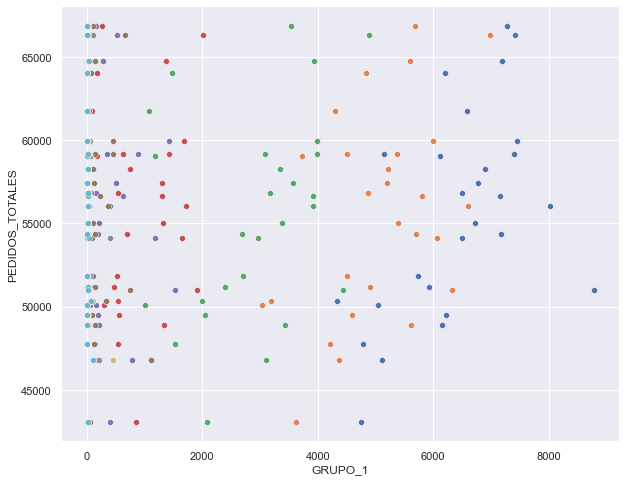

In [2520]:
## Se graficaron los pedidos totales para los grupos del 1 al 10
for i in range(1,11):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

#### Correlación Pearson:

<AxesSubplot:>

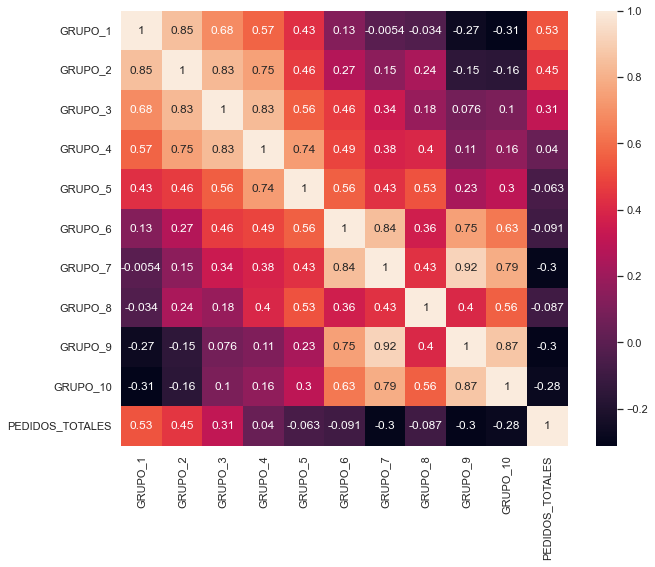

In [2521]:
sns.heatmap(df.corr(method='pearson'), annot=True)

Solo se consideraron las variables con un coeficiente de corelacion mayor a 0.3 (corelacion moderada). Por ende, las Xn para el modelo1 se consideraron como:

- Grupo 1 (corr = 0.53)
- Grupo 2 (corr = 0.45)
- Grupo 3 (corr = 0.31)

<AxesSubplot:xlabel='CAMPAÑA', ylabel='PEDIDOS_TOTALES'>

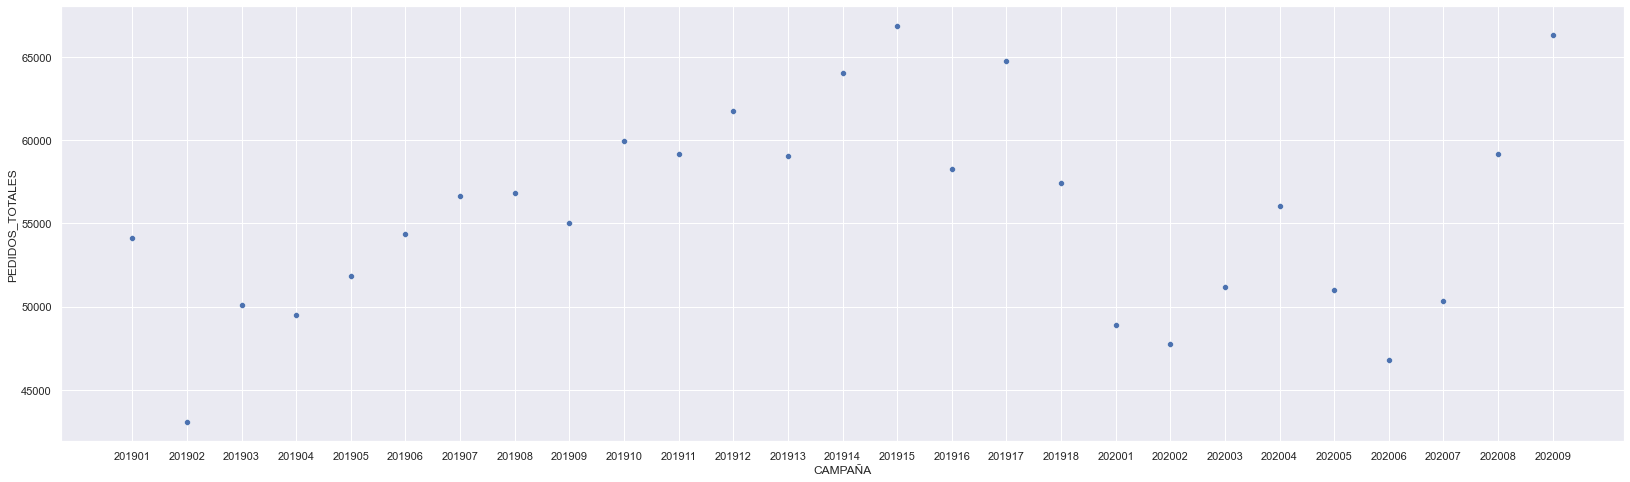

In [2522]:
## Se analizó los pedidos totales en funcion a cada campaña 
sns.set(rc={"figure.figsize":(28, 8)}) 
sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

---

<AxesSubplot:xlabel='GRUPO_1', ylabel='PEDIDOS_TOTALES'>

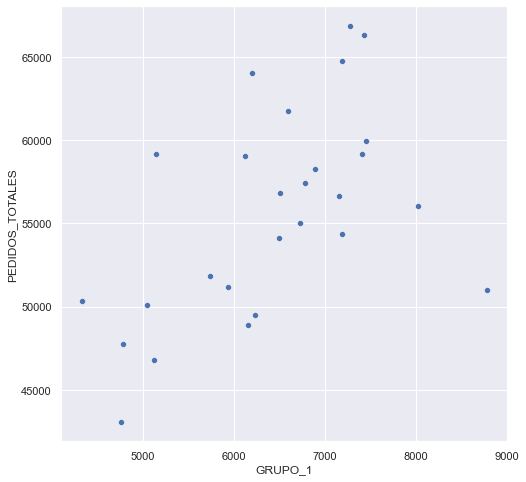

In [2523]:
## Se analizaron los pedidos totales por grupo uno a uno para ver la distribucion de los datos 
sns.set(rc={"figure.figsize":(8, 8)}) 


sns.scatterplot(data=df, x='GRUPO_1', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.53)

<AxesSubplot:xlabel='GRUPO_2', ylabel='PEDIDOS_TOTALES'>

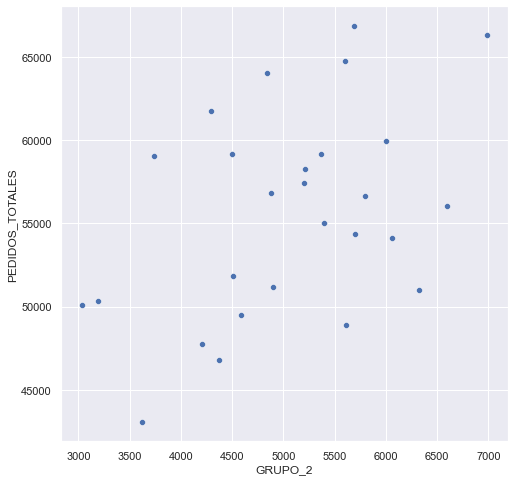

In [2524]:
sns.scatterplot(data=df, x='GRUPO_2', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.45)

<AxesSubplot:xlabel='GRUPO_3', ylabel='PEDIDOS_TOTALES'>

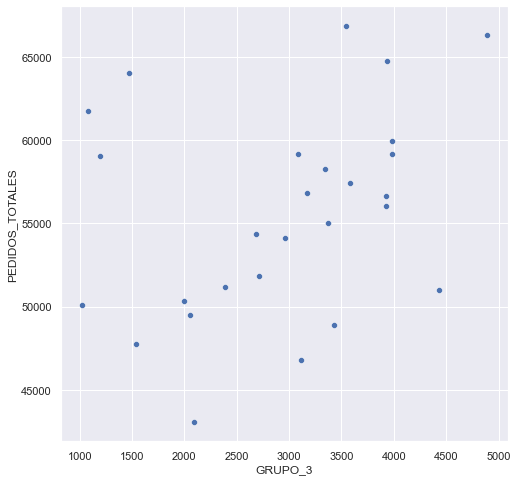

In [2525]:
sns.scatterplot(data=df, x='GRUPO_3', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok

<AxesSubplot:xlabel='GRUPO_4', ylabel='PEDIDOS_TOTALES'>

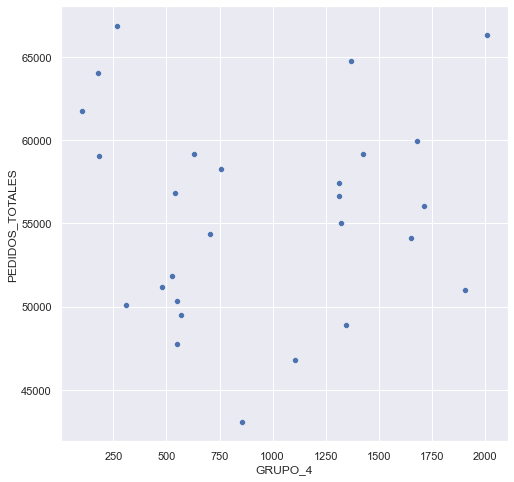

In [2526]:
sns.scatterplot(data=df, x='GRUPO_4', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_5', ylabel='PEDIDOS_TOTALES'>

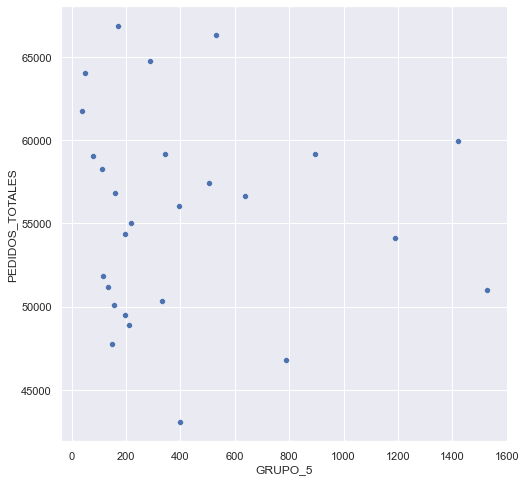

In [2527]:
sns.scatterplot(data=df, x='GRUPO_5', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_6', ylabel='PEDIDOS_TOTALES'>

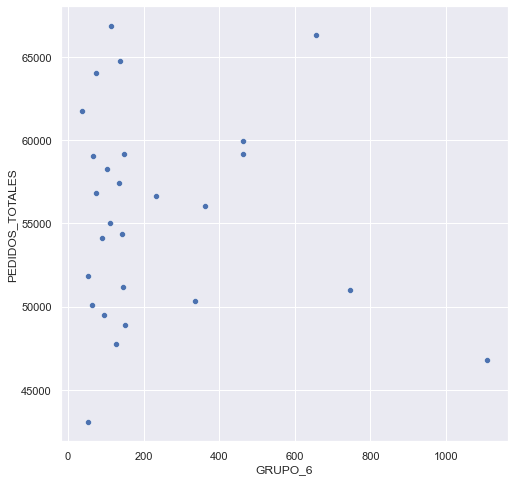

In [2528]:
sns.scatterplot(data=df, x='GRUPO_6', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_7', ylabel='PEDIDOS_TOTALES'>

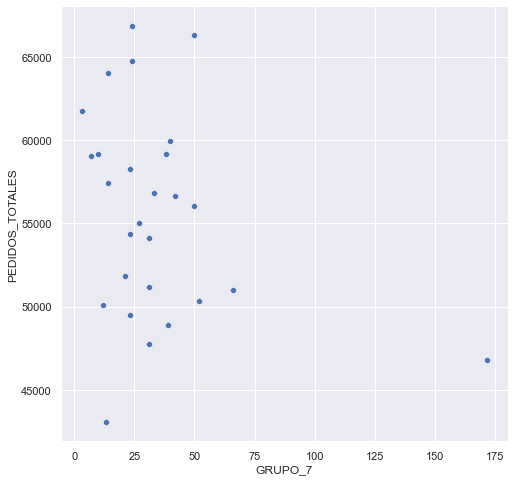

In [2529]:
sns.scatterplot(data=df, x='GRUPO_7', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok // corr = 0.31

<AxesSubplot:xlabel='GRUPO_8', ylabel='PEDIDOS_TOTALES'>

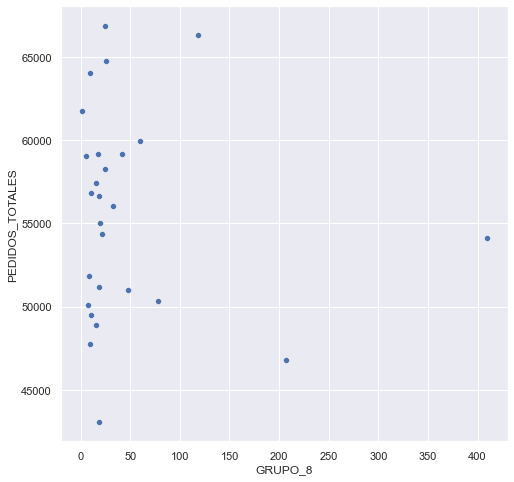

In [2530]:
sns.scatterplot(data=df, x='GRUPO_8', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_9', ylabel='PEDIDOS_TOTALES'>

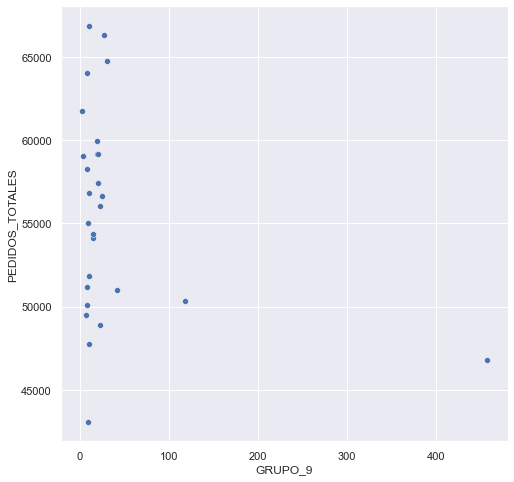

In [2531]:
sns.scatterplot(data=df, x='GRUPO_9', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_10', ylabel='PEDIDOS_TOTALES'>

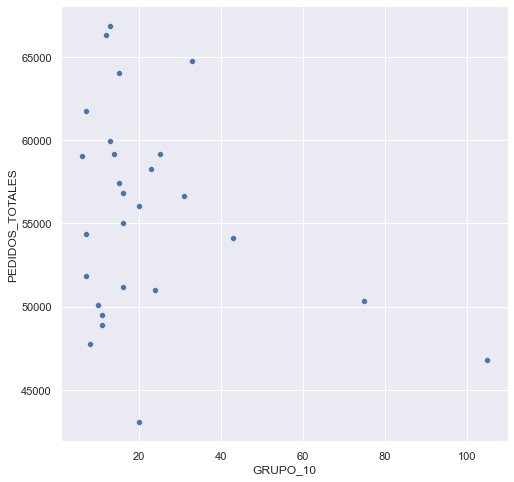

In [2532]:
sns.scatterplot(data=df, x='GRUPO_10', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no // corr = 0.28

---

## Modelamiento de los datos


### Regresion Lineal - Modelo 1

Asumimos un comportamiento lineal 

Y = Pedidos totales

Xn = Grupo1 , Grupo2, Grupo3 

Outcome: predecir los pedidos totales, en función a los pedidos de cada grupo n. 

Para este modelo se trabajó con los grupos 1,2,3 ya que su coeficiente de correlacion era mayor a 0.3

In [2533]:
# Librerias para el modelo de regreesion
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

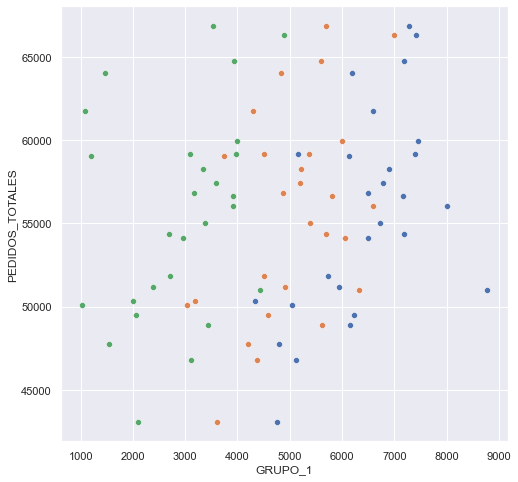

In [2534]:
for i in range(1,4):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

In [2556]:
## Se aplico un Modelo de Regresion Lineal para hallar los coeficientes de la ecuacion

X = df.iloc[:,0:3]
X


y = df['PEDIDOS_TOTALES']
X_train, X_test, y_train,y_test = train_test_split(X,y)

lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_train)
coef = lin.coef_
print(coef)

[1.80808846 1.02303029 0.74618461]


In [2557]:
## Ecuacion de la recta ## y = mx1x1 + ... m3x3 + b 

ecuacion = pd.DataFrame((zip)(X.columns,coef), columns =['grupo','coeficiente m'])
ecuacion = ecuacion.append({'grupo':'intercepto b','coeficiente m':lin.intercept_},ignore_index=True)
print(ecuacion)

ecuacion.to_csv('coeficientes.csv')

          grupo  coeficiente m
0       GRUPO_1       1.808088
1       GRUPO_2       1.023030
2       GRUPO_3       0.746185
3  intercepto b   36193.911406


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ajuste de regresion lineal - Pedidos Totales vs G1,G2 y G3')

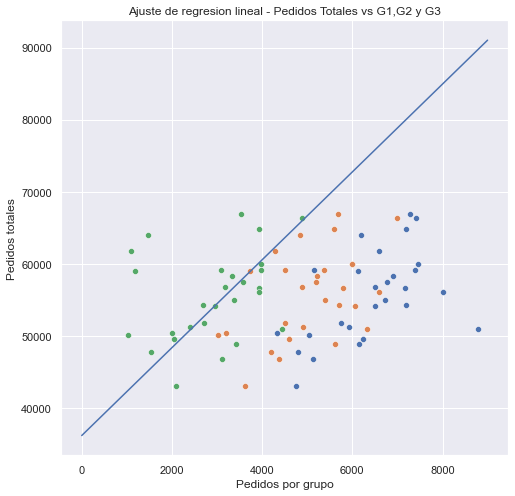

In [2558]:
## Graficamos los datos y la recta de regresion

for i in range(1,4):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

x_value = [x for x in range(0,9000)]
y_value = [x * coef[0] + coef[1] * 2 *x + coef[2] * 3 *x for x in x_value] + lin.intercept_

sns.lineplot(x_value,y_value)
plt.xlabel('Pedidos por grupo')
plt.ylabel('Pedidos totales')
plt.title('Ajuste de regresion lineal - Pedidos Totales vs G1,G2 y G3')


In [2539]:
g1 = int(input("Ingrese las ventas del Grupo 1: "))
g2 = int(input("Ingrese las ventas del Grupo 2: "))
g3 = int(input("Ingrese las ventas del Grupo 3: "))

ecuacion = round(coef[0]*g1 + coef[1]*g2 + coef[2]*g3 + lin.intercept_,2)
print("Los pedidos totales predichos segun el metodo de regresion lineal seran", ecuacion , "pedidos aproximadamente")

Los pedidos totales predichos segun el metodo de regresion lineal seran 2139064.04 pedidos aproximadamente


In [2540]:
## Evaluando el criterio R2 y MSE

print('Error cuadratico Medio: ' + str(mean_squared_error(y_train,y_pred)))
print('R2 score ' + str(r2_score(y_train,y_pred)))

Error cuadratico Medio: 29135493.57768911
R2 score 0.1810332728643903


In [2541]:
df["REGRESION_LINEAL"] = [(x) for x in y_value[:27]] 

In [2542]:
df

,CAMPAÑA,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES,REGRESION_LINEAL
0,201901,6492,6062,2961,1652,1190,89,31,410,15,43,54113,2.139212e+06
1,201902,4757,3618,2089,855,399,54,13,19,9,20,43091,2.139208e+06
2,201903,5047,3031,1018,309,157,63,12,7,8,10,50112,2.139203e+06
3,201904,6227,4586,2056,569,197,94,23,10,7,11,49522,2.139199e+06
4,201905,5738,4504,2710,525,114,54,21,8,10,7,51854,2.139195e+06
5,201906,7182,5702,2684,703,195,142,23,22,15,7,54349,2.139191e+06
6,201907,7159,5800,3921,1313,637,232,42,19,25,31,56634,2.139187e+06
7,201908,6502,4876,3169,542,159,73,33,10,10,16,56826,2.139183e+06
8,201909,6725,5394,3375,1324,219,110,27,20,9,16,55058,2.139179e+06
9,201910,7452,5996,3983,1679,1421,463,40,60,19,13,59947,2.139175e+06


### Regresion Lineal - Modelo 2 

- Se modelaron las variables GRUPO individualmente para los 3 grupos
- Las variables de prueba y entrenamiento no fueron divididas 

-----

Error cuadratico Medio: 26663185.59938388
R2 score 0.2799513990856304


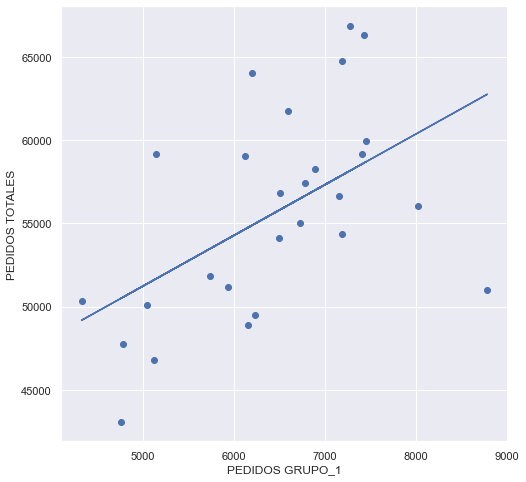

In [2543]:
## Regresion lineal X = GRUPO_1

X1 = df['GRUPO_1'].values.reshape(-1,1)
y1 = df['PEDIDOS_TOTALES'].values.reshape(-1,1)
modeloG1 = LinearRegression()
modeloG1.fit(X1,y1)
y_pred1 = modeloG1.predict(X1)

modeloG1.coef_
modeloG1.intercept_


plt.scatter(X1,y1)
plt.plot(X1,y_pred1)
plt.ylabel('Ajuste de regresion lineal - Pedidos Totales vs G1')
plt.xlabel('PEDIDOS GRUPO_1')
plt.ylabel('PEDIDOS TOTALES')

print('Error cuadratico Medio: ' + str(mean_squared_error(y1,y_pred1)))
print('R2 score ' + str(r2_score(y1,y_pred1)))


Error cuadratico Medio: 29619219.37168111
R2 score 0.20012267891772106


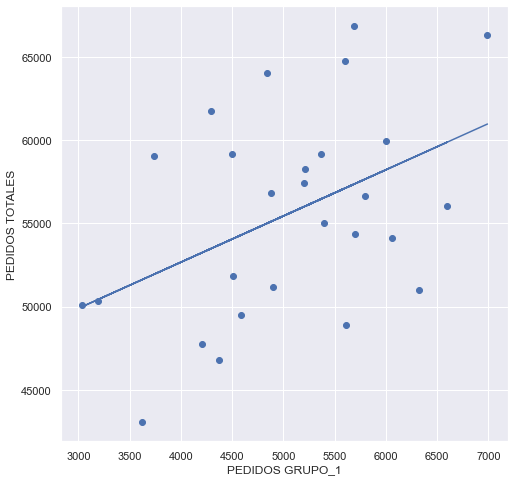

In [2544]:
## Regresion lineal X = GRUPO_2

X2 = df['GRUPO_2'].values.reshape(-1,1)
y2 = df['PEDIDOS_TOTALES'].values.reshape(-1,1)
modeloG2 = LinearRegression()
modeloG2.fit(X2,y2)
y_pred2 = modeloG2.predict(X2)

modeloG2.coef_
modeloG2.intercept_


plt.scatter(X2,y2)
plt.plot(X2,y_pred2)
plt.ylabel('Ajuste de regresion lineal - Pedidos Totales vs G2')
plt.xlabel('PEDIDOS GRUPO_1')
plt.ylabel('PEDIDOS TOTALES')

print('Error cuadratico Medio: ' + str(mean_squared_error(y2,y_pred2)))
print('R2 score ' + str(r2_score(y2,y_pred2)))


Error cuadratico Medio: 33407076.09777705
R2 score 0.09783029056362691


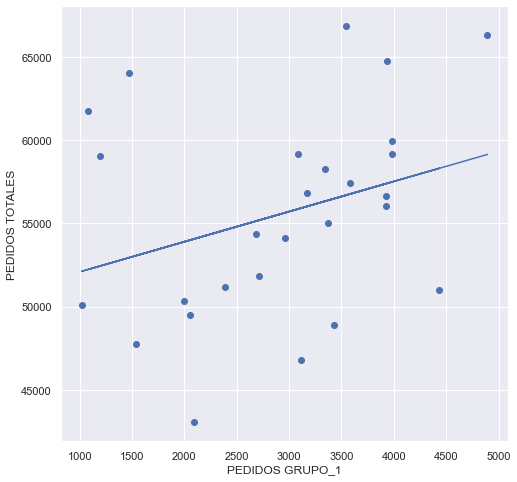

In [2545]:
## Regresion lineal X = GRUPO_3

X3 = df['GRUPO_3'].values.reshape(-1,1)
y3 = df['PEDIDOS_TOTALES'].values.reshape(-1,1)
modeloG3 = LinearRegression()
modeloG3.fit(X3,y3)
y_pred3 = modeloG3.predict(X3)

modeloG3.coef_
modeloG3.intercept_


plt.scatter(X3,y3)
plt.plot(X3,y_pred3)
plt.ylabel('Ajuste de regresion lineal - Pedidos Totales vs G3')
plt.xlabel('PEDIDOS GRUPO_1')
plt.ylabel('PEDIDOS TOTALES')

print('Error cuadratico Medio: ' + str(mean_squared_error(y3,y_pred3)))
print('R2 score ' + str(r2_score(y3,y_pred3)))


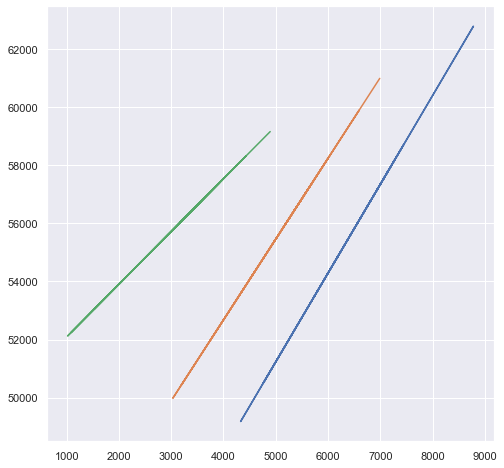

In [2546]:
plt.plot(X1,y_pred1)
plt.plot(X2,y_pred2)
plt.plot(X3,y_pred3)

### Conclusiones y recomendaciones

- Se concluye que este modelo de regresion lineal aplicado a los pedidos totales no ha sido adecuado para hacer predicciones acertadas, ya que su R2 tiende a ser inferior a 0.5, tomando como media valores de 0.3, llegando incluso a tener valores inferiores a 0.1 


- Se infiere que la relacion entre los pedidos por grupo y los pedidos totales es No-Lineal.


- Las variables de respuesta elegidas, no han sido siginficativas para el modelo. Probablemente con una mayor cantidad de variables y datos, el modelo describiría mejor al comportamiento de los pedidos totales.

### Promedio Móvil:

Asumimos un comportamiento estacionario

Outcome: predecir los pedidos totales de la campaña n+1 basandonos en las n campañas pasadas. 

#### Variables:

Y = Pedidos totales


t = Campaña (201901 - 202009)


Periodo de medicion: inicio de una campaña. Es decir, 201901 -> 201902

<AxesSubplot:xlabel='CAMPAÑA', ylabel='PEDIDOS_TOTALES'>

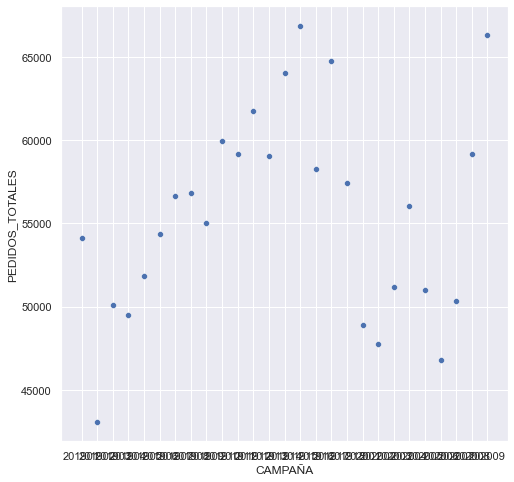

In [2547]:
sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

<AxesSubplot:>

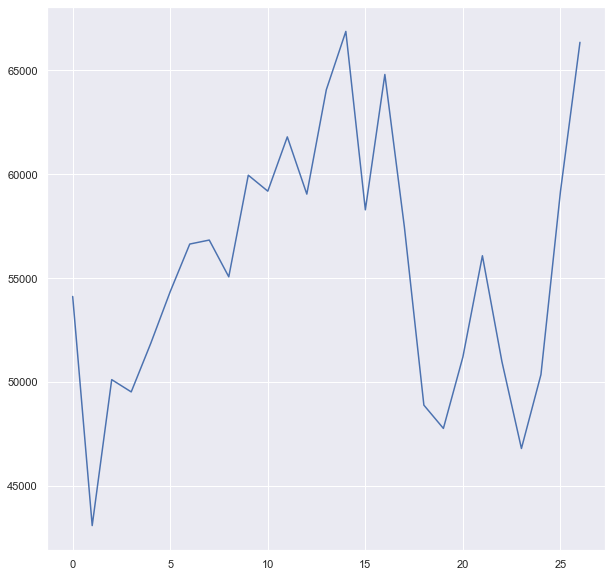

In [2548]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))

In [2549]:
df.rename({"CAMPAÑA" : "FECHA"}, axis=1,inplace=True)
df

,FECHA,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES,REGRESION_LINEAL
0,201901,6492,6062,2961,1652,1190,89,31,410,15,43,54113,2.139212e+06
1,201902,4757,3618,2089,855,399,54,13,19,9,20,43091,2.139208e+06
2,201903,5047,3031,1018,309,157,63,12,7,8,10,50112,2.139203e+06
3,201904,6227,4586,2056,569,197,94,23,10,7,11,49522,2.139199e+06
4,201905,5738,4504,2710,525,114,54,21,8,10,7,51854,2.139195e+06
5,201906,7182,5702,2684,703,195,142,23,22,15,7,54349,2.139191e+06
6,201907,7159,5800,3921,1313,637,232,42,19,25,31,56634,2.139187e+06
7,201908,6502,4876,3169,542,159,73,33,10,10,16,56826,2.139183e+06
8,201909,6725,5394,3375,1324,219,110,27,20,9,16,55058,2.139179e+06
9,201910,7452,5996,3983,1679,1421,463,40,60,19,13,59947,2.139175e+06


In [2550]:
##df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df.set_index("FECHA")
df

,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES,REGRESION_LINEAL
FECHA,,,,,,,,,,,,
201901,6492,6062,2961,1652,1190,89,31,410,15,43,54113,2.139212e+06
201902,4757,3618,2089,855,399,54,13,19,9,20,43091,2.139208e+06
201903,5047,3031,1018,309,157,63,12,7,8,10,50112,2.139203e+06
201904,6227,4586,2056,569,197,94,23,10,7,11,49522,2.139199e+06
201905,5738,4504,2710,525,114,54,21,8,10,7,51854,2.139195e+06
201906,7182,5702,2684,703,195,142,23,22,15,7,54349,2.139191e+06
201907,7159,5800,3921,1313,637,232,42,19,25,31,56634,2.139187e+06
201908,6502,4876,3169,542,159,73,33,10,10,16,56826,2.139183e+06
201909,6725,5394,3375,1324,219,110,27,20,9,16,55058,2.139179e+06


<AxesSubplot:xlabel='FECHA'>

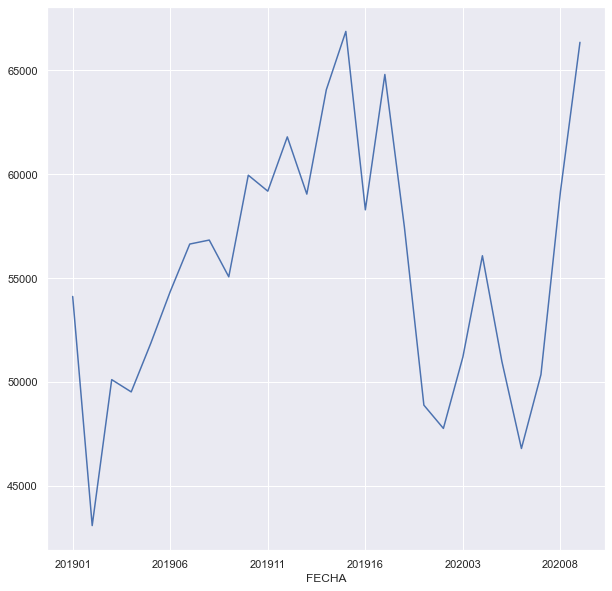

In [2551]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))

<AxesSubplot:xlabel='FECHA'>

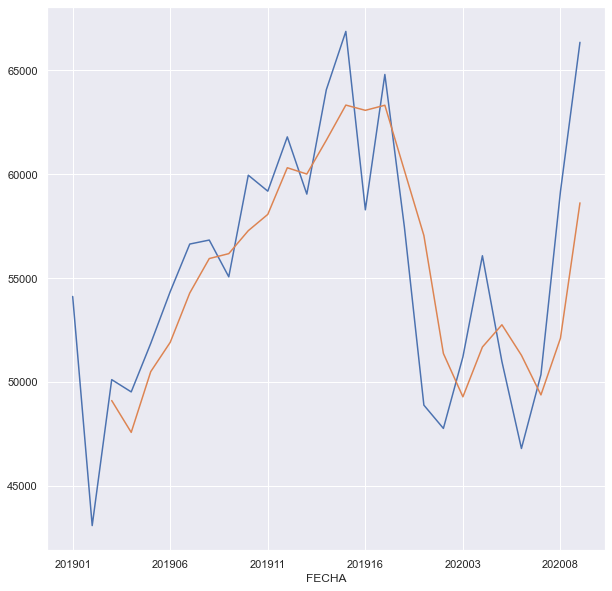

In [2552]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))
df['PEDIDOS_TOTALES'].rolling(window=3).mean().plot()

In [2553]:
df['PROMEDIO_MOVIL'] = df['PEDIDOS_TOTALES'].rolling(window=3).mean()


In [2554]:
mediciones = df['PEDIDOS_TOTALES'].count()

In [2555]:
pedidos_siguiente_campaña = df['PROMEDIO_MOVIL'].sum() / df['PROMEDIO_MOVIL'].count() ## Pronostico de los pedidos para la campaña n+1
print("Usando el metodo de Promedio Movil, los pedidos totales predichos para la medicion numero",mediciones+1, "seran", round(pedidos_siguiente_campaña,2),"pedidos aproximadamente")

Usando el metodo de Promedio Movil, los pedidos totales predichos para la medicion numero 28 seran 55445.44 pedidos aproximadamente


### Conclusiones y recomendaciones

- Se puede concluir que el comportamiendo de la demanda (pedidos totales) es estacionario. 


- Este modelo tiene la limitacion de que solo puede predecir un periodo mas (en este caso, la siguiente campaña)


- Para la realización del modelo solo se contó con 27 mediciones, por lo que fue util aplicar promedio movil


- El promedio movil pone enfasis en las ultimas mediciones, en caso se tengan mas datos históricos la capacidad de predecir los pedidos totales disminuiría ya que se podrían estar ignorando corelaciones y data significativa
